# Variables aleatorias discretas

In [1]:
import numpy as np #Importamos el modelo numpy
import numpy.random as npr #para genrar numeros aleatorios
import scipy.stats as sps #importamos modulo scipy
from scipy.stats import randint #para trabajar con una dist uniforme discreta en un rango de enteros
import matplotlib.pyplot as plt
import random #modulo estandar de python para generar numeros aleatorios
import warnings  #controlar mensajes de advertencia
warnings.filterwarnings("ignore")

# Variable aleatoria uniforme discreta

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_{1},\dots,x_{n}\}$ si su función de masa de probabilidades está dada por
$$f_{X}(k)=\mathbb{P}(X=k)=\begin{cases}
\frac{1}{n} &\quad \text{si } k\in\{x_{1},\dots,x_{n}\} \\
0 &\quad \text{en otro caso}
\end{cases}$$

**Notación:** $X\sim Unif(x_{1},\dots,x_{n}).$

Se llama uniforme porque cada uno de los posibles valores de $X$ tienen la misma probabilidad.

Si $X\sim Unif(x_{1},\dots,x_{n})$, en este caso, se tiene:
	$$\mathbb{E}[X] = \sum_{k}kf_{X}(k)=\frac{x_n + x_1}{2}.$$
	y
	$$\text{Var}(X) = \mathbb{E}[(X-\mathbb{E}[X])^{2}] =\sum_{k}(k-\mathbb{E}[X])^{2}f_{X}(k)=\frac{(x_n - x_1+1)^2-1}{12}$$

$\color{red}{\text{Ejercicio 1.}}$ Verifica que, en efecto, la esperanza y varianza de una variable aleatoria geométrica está dada como antes.
    
**Ejemplo** Se lleva a cabo una rifa donde los boletos están enumerados del $00$ al $99$. Si $Y$ es la variable aleatoria definida como el número del boleto ganador, entonces:  
$$\mathbb{P}(Y=k)=\begin{cases}
	\frac{1}{100} &\quad \text{si } k=00,01,\dots,99 \\
	0 &\quad \text{en otro caso}
\end{cases}$$
Consideremos que el premio de la rifa se determina a partir del número premiado de la siguiente forma: $X=Y+1$, donde $X$ es el monto del premio en pesos y $Y$ es el número premiado, entonces $X$ es una variable aleatoria, pues es una función de $Y$, y además se tiene
	$$f_{X}(k)=\begin{cases}
		\frac{1}{100} &\quad \text{si } x=1,2,\dots,100 \\
		0 &\quad \text{en otro caso}
	\end{cases}$$
Entonces, la esperanza y varianza de $X$ están dados por:
	$$\mathbb{E}[X] = \sum_{k=1}^{100}k\left(\frac{1}{100}\right) = \frac{1}{100}\sum_{k=1}^{100}k = \frac{1}{100}\left[\frac{100(100+1)}{2}\right] = 50.5$$
	y
	$$\text{Var}(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} = \sum_{k=1}^{100}k^{2}\left(\frac{1}{100}\right)-(50.5)^{2} = 833.25$$   


    
Supongamos que nos interesa calcular la probabilidad de que el premio sea mayor a $\$80$, entonces
	$$\mathbb{P}(X>80) = \sum_{k=81}^{100}\frac{1}{100} = \frac{20}{100} = 0.2$$
	Su función de distribución esta dada por:
	$$F_{X}(x)=\mathbb{P}(X\le x)=\begin{cases}
		0 &\quad \text{si } x<1 \\
		\frac{x}{100} &\quad \text{si } x=1,2,\dots,100\\ 1 &\quad \text{si } x>100
	\end{cases}$$     

$\color{red}{\text{Ejercicio 2.}}$ Dibuja a la función de distribución acumulada de la variable aleatoria:
$$S:\{1,2,3,4,5,6\}^{2}\to \{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 \}$$
dada por
$S(i,j)=i+j.$

In [2]:
#Definir el rango de dist uniforme discreta (low,high)
low = 1
high = 10 #se exluye el 10

#Generar 10 muestras de una uniforme discreta
samples = randint.rvs(low,high,size=10)
print("Muestras generadas:", samples)

Muestras generadas: [7 5 7 9 4 7 1 8 3 8]


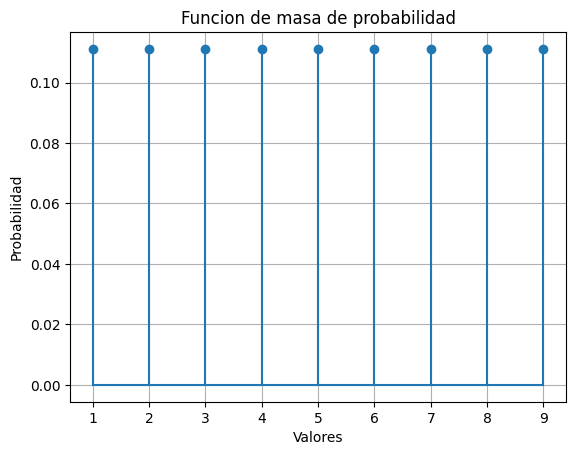

In [3]:
#Crear valores posibles dentro del rango
x=np.arange(low,high)
#Obtener funcion de densidad
pmf = randint.pmf(x,low,high)

#Graficar pmf
plt.stem(x,pmf,basefmt="",use_line_collection=True)
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.title("Funcion de masa de probabilidad")
plt.grid(True)
plt.show()

## Variable aleatoria Bernoulli con parámetro $p\in (0,1)$.

El modelo probabilístico Bernoulli se aplica a un experimento cuyo espacio muestral está constituido sólo por dos resultados posibles, éxito y fracaso:

Se considerará una v.a $X$ sobre el espacio muestral $$\Omega=\{\text{éxito, fracaso}\}$$
de tal forma que
* $X(\{\text{éxito}\}) = 1$
* $X(\{\text{fracaso}\}) = 0$

Las probabilidades asociadas a este modelo son:

* $\mathbb{P}(\{\text{éxito}\}) = p$
* $\mathbb{P}(\{\text{fracaso}\}) = 1-p$

donde $0<p<1$.


Entonces la función de densidad de masa de probabilidades de $X$ está dada por:

$$f_{X}(k)=\begin{cases}
p &\quad \text{si } k=1 \\
1-p &\quad \text{si } k=0
\end{cases}$$

**Notación:** $X\sim \text{Ber}(p)$.

Esta variable aleatoria es muy importante. En la practica es usada para modelar situaciones en las cuales hay dos posibles resultados como:
* el estado de un teléfono en un momento dado: libre u ocupado.
* una persona pueda estar enferma o sana de una determinada enfermedad.
* la preferencia de una persona, la cual puede estar a favor o en contra de un candidato determinado.

Mediante la combinación de variables aleatorias Bernoulli es posible construir otras variables aleatorias.

### Esperanza y Varianza

Si $X\sim \text{Ber}(p)$, entonces su esperanza es:
\begin{align*}
\mathbb{E}[X] = \sum_{k=0}^{1}kf_{X}(k) = 1\cdot p + 0\cdot (1-p) = p.
\end{align*}

Y su varianza se calcula usando,
$$\mathbb{E}[X^{2}] = \sum_{k=0}^{1}k^{2}f_{X}(k) = 1^{2}\cdot p + 0^{2}\cdot (1-p) = p.$$
Por lo tanto,
$$\text{Var}(X)=\mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} = p-p^{2} = p(1-p)$$



In [4]:
from scipy.stats import bernoulli

Funcion de densidad= [0.7 0.3]


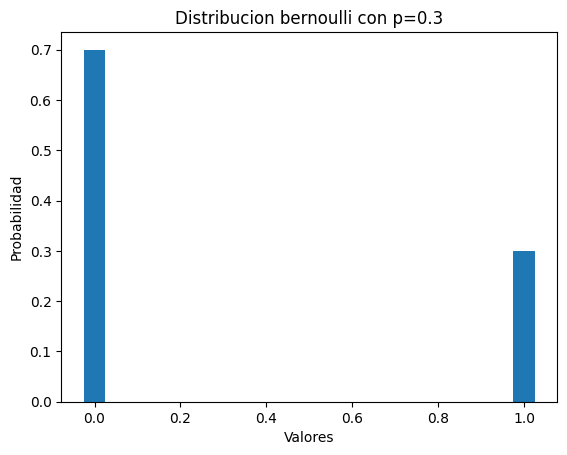

Esperanza = 0.3
Varianza= 0.21


In [5]:
#Definimos la p de exito
p=0.3

#Calculo de la funcion de densidad
x=[0,1]
print("Funcion de densidad=",bernoulli.pmf(x,p))

#Grafica de la dunción de densidad
plt.bar(x,bernoulli.pmf(x,p),width=0.05)
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.title("Distribucion bernoulli con p=0.3")
plt.show()

#Calculo de la esperanza
print("Esperanza =",bernoulli.mean(p))
#Calculo de la varianza
print("Varianza=",bernoulli.var(p))

## Variable aleatoria Binomial con parámetros $n$ y $p\in (0,1)$.

Decimos que una v.a $X$ tiene distribución binomial con párametros $n$ y $p$, si su función de densidad de masa de probabilidades está dada por:
$$\begin{equation*}
	f_{X}(k)=\begin{cases}
	\binom{n}{k}p^{k}(1-p)^{n-k} &\quad \text{si } k=0,1,\dots,n \\
	\qquad 0 &\quad \text{en otro caso}  
	\end{cases}
\end{equation*}$$
donde $n$ es un entero positivo y $0< p< 1$.

La esperanza de $X$ es:
\begin{align*}
\mathbb{E}[X]&= \sum_{k \mathop = 0}^n k \binom n k p^k (1-p)^{n - k}\\
&=\sum_{k \mathop = 1}^n k \binom n k p^k (1-p)^{n - k}\\
&= \sum_{k \mathop = 1}^n n \binom {n - 1} {k - 1} p^k (1-p)^{n - k}\\
&= n p \sum_{k \mathop = 1}^n \binom {n - 1} {k - 1} p^{k - 1} (1-p)^{( {n - 1}) - ( {k - 1}) }\\
&=n p \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\\
&=np
\end{align*}

Ahora,
\begin{align*}
\mathbb{E}[X^2]&= \sum_{k \mathop = 0}^n k^2 \binom n k p^k (1-p)^{n - k}\\
&=\sum_{k \mathop = 0}^n k n \binom {n - 1} {k - 1} p^k (1-p)^{n - k}\\
&= n p \sum_{k \mathop = 1}^n k \binom {n - 1} {k - 1} p^{k - 1} (1-p)^{({n - 1}) - ({k - 1}) }\\
&= n p \sum_{j \mathop = 0}^m ({j + 1}) \binom m j p^j (1-p)^{m - j}\\
&=n p \left( {\sum_{j \mathop = 0}^m j \binom m j p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&=n p \left( {\sum_{j \mathop = 0}^m m \binom {m - 1} {j - 1} p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&= n p \left( (n - 1) p \sum_{j \mathop = 1}^m \binom {m - 1}{j - 1} p^{j - 1} (1-p)^{( {m - 1}) - ({j - 1}) } + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\right) \\
&= n p \left( (n - 1) p (p + (1-p))^{m - 1} + (p + (1-p))^m\right)\\
&= n p ((n - 1) p + 1)\\
&= (np)^2 +np(1-p),
\end{align*}

por lo que la varianza de $X$ es:
$$\text{Var}(X)=np(1-p).$$


**Ejemplo** Una moneda no justa se tira 6 veces, donde la probabilidad de obtener sol es de $0.3$. Sea $X$ el número de veces que cae sol, entonces $X$ tiene una distribución binomial con parámetros $n=6$ y $p=0.3$. Por lo que
$$\begin{align*}
\mathbb{P}(X=2) &= \binom{6}{2}(0.3)^{2}(0.7)^{4}=0.3241 \\
\mathbb{P}(X=3) &= \binom{6}{3}(0.3)^{3}(0.7)^{3}=0.1852 \\
\mathbb{P}(1<X\le 5) &= \mathbb{P}(X=2)+\mathbb{P}(X=3)+\mathbb{P}(X=4)+\mathbb{P}(X=5) \\
			&= 0.3241 + 0.1852 + \binom{6}{4}(0.3)^{4}(0.7)^{2} + \binom{6}{5}(0.3)^{5}(0.7)^{1} \\
			&= 0.5093 + 0.0595 + 0.0102 = 0.579
\end{align*}$$

Note que la probabilidad $$\mathbb{P}(1<X\leq 5)=F_{X}(5)-F_{X}(1).$$

Usando el tributo .cdf, podemos calcular la probabilidad anterior:


In [6]:
from scipy.stats import binom

In [7]:
F5= binom.cdf(5,6,0.3) #Calcula p acumulada de que haya 5 o menos exitos en 6 ensayos
F1=binom.cdf(1,6,0.3) #Calcula p acumulada de que haya 1 o menos exitos en 6 ensayos
F5-F1

0.5790960000000003

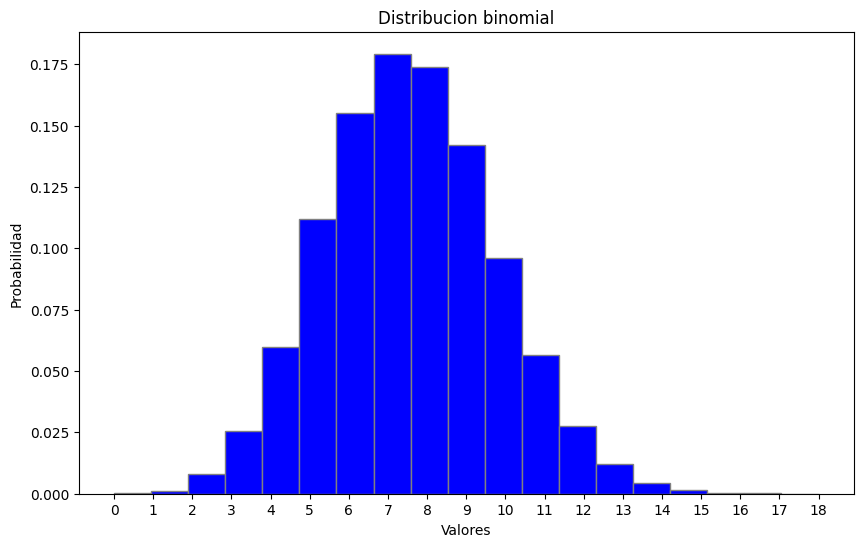

In [8]:
#Graficar funcion de densidad de una binomial

#Datos iniciales
n = 25
p = 0.3
s = 100000 #Numero de muestras

binom_numeros =sps.binom.rvs(n,p,size = s) #genera num aleatorios que siguen una dist binomial

plt.figure(figsize = (10,6)) #tamaño de la figura
plt.hist(
    binom_numeros,
    density = True,
    bins = len(np.unique(binom_numeros)), #establece el numero de barras del histograma
    color = "blue",
    edgecolor = "grey"
)
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.title("Distribucion binomial")
plt.xticks(np.arange(min(binom_numeros),max(binom_numeros)+1,1))
plt.show()

# Variable aleatoria Poisson

Es una distribución de probabilidad discreta que  sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser de tiempo, longitud, área, etc.

Esta variable aleatoria toma los valores sobre el conjunto $\{0,1,2,\dots\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se espera que ocurra un evento durante un intervalo dado.

La función de masa de probabilidades de una variable aleatoria Poisson, $X$, está dada por:
$$f_{X}(k)=\begin{cases}
	e^{-\lambda}\frac{\lambda^{k}}{k!} &\quad \text{si } k=0,1,2,\dots \\
	0 &\quad \text{en otro caso}  
\end{cases}$$

En efecto, es una función de masa de probabilidades debido a que
$$\begin{align*}
\sum_{k=0}^{\infty}e^{-\lambda}\frac{\lambda^{k}}{k!} &= e^{-\lambda}\sum_{k=0}^{\infty}\frac{\lambda^{k}}{k!} \\ &= e^{-\lambda}\underbrace{\left(1+\lambda+\frac{\lambda^{2}}{2!}+\frac{\lambda^{3}}{3!}+\cdots\right)}_{\text{desarrollo de Taylor de }e^{\lambda}} \\ &= e^{-\lambda}e^{\lambda}=1.
\end{align*}$$

**Aplicaciones**

**Ejemplo:** Supongamos que el número de accidentes que ocurre en un punto tiene una distribución Poisson con parámetro $\lambda=2$.
* ¿Cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$\begin{align*}
	\mathbb{P}(X>2) &= 1-\mathbb{P}(X\le 2) \\ &=1-\left[\mathbb{P}(X=0)+\mathbb{P}(X=1)+\mathbb{P}(X=2)\right] \\ &= 1-\left[\frac{e^{-2}2^{0}}{0!}+\frac{e^{-2}2^{1}}{1!}+\frac{e^{-2}2^{2}}{2!}\right] \\ &= 1-e^{-2}\left[1+2+2\right] = 1-5e^{-2} = 0.3233
  \end{align*}$$

* ¿Cuál es la probabilidad de que en un día ocurran más de dos accidentes, sabiendo que ocurre por lo menos uno?
$$\begin{align*}
\mathbb{P}(X>2 \mid X\ge 1) = \frac{\mathbb{P}(X>2 \cap X\ge 1)}{\mathbb{P}(X\ge 1)} = \frac{\mathbb{P}(X>2)}{\mathbb{P}(X\ge 1)} = \frac{1-\mathbb{P}(X \leq 2)}{1-\mathbb{P}(X < 1)}=\frac{1-5e^{-2}}{1-e^{-2}} = \frac{0.3233}{0.8646} = 0.3739
\end{align*}$$
ya que $\mathbb{P}(X\ge 1)=1-\mathbb{P}(X<1)=1-\mathbb{P}(X=0)=1-e^{-2}$

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores.




In [9]:
from scipy.stats import poisson

In [10]:
#Probabilidad de que en un dia ocurran mas de dos accidentes
F2= poisson.cdf(2,2) #Calcula p acumulada de que haya 5 o menos exitos en 6 ensayos
1-F2

0.3233235838169366

In [11]:
#Probabilidad de que en un dia ocurran más de dos accidentes sabiendo que ocurre al menos uno
F0= poisson.cdf(0,2) #Calcula p acumulada de que haya 5 o menos exitos en 6 ensayos
1-F0 #Probabilidad que ocurra menos de 1
1-F2 #Probabilidad de que ocurra 2 o menos
(1-F2)/(1-F0)

0.37392942900133747

## Aproximación de Poisson a la Binomial
La distribución de Poisson es una forma límite de la distribución binomial, es decir, es una buena aproximación cuando $n$ es suficientemente grande y $p$ suficientemente pequeña.

$\textbf{Teorema (Poisson).-}$ Sean $S_{n}\sim Bin(n,p_{n})$ bajo el regimen $$\lim_{n\to \infty}np_{n}=\lambda>0.$$
Consideremos la siguiente sucesión de números reales:
$$a_{j}(n,p_n)=\begin{cases}\binom{n}{j}(p_n)^{j}(1-p_{n})^{n-j} & j\leq n\\
0 & j\geq n+1\end{cases}$$

 Entonces,
 $$\lim_{n\to \infty}a_{j}(n,p_n)=a_{j}=e^{-\lambda}\frac{\lambda^{j}}{j!} \ \ \forall j\in \mathbb{N}.$$

 El teorema anterior implica que la distribución de Poisson ofrece un modelo probabilístico adecuado para todos aquellos experimentos aleatorios 	en los que las repeticiones son independientes unas de otras y en los 	que sólo hay dos posibles resultados: éxito o fracaso, con probabilidad de 	éxito pequeña, y en los que el interés se centra en conocer el número de éxitos obtenidos al realizar el experimento un número suficientemente grande de veces.

Empíricamente se ha establecido, que la aproximación se puede aplicar con seguridad si $n\ge100$, $p\le 0.01$ y $np \le20$.

**Ejemplo** Supongamos que la probabilidad de que un producto producido por cierta máquina es defectuoso es de $0.1$. ¿Cuál es la probabilidad de que un lote de 10 productos contenga a lo más un producto defectuoso?

Sea $X$ el número de productos defectuosos, y sabemos que $X$ tiene una distribución binomial con parámetros $n=10$ y $p=0.1$, entonces
\begin{align*}
\mathbb{P}(X\le 1) &= \mathbb{P}(X=0)+\mathbb{P}(X=1) \\ &= \binom{10}{0}(0.1)^{0}(0.9)^{10-0}+\binom{10}{1}(0.1)^{1}(0.9)^{10-1} \\ &= 0.7361
	\end{align*}

Ahora, con la distribución Poisson, tenemos que $\lambda=10(0.1)=1$, por lo que
$$\mathbb{P}(X\le 1) = \mathbb{P}(X=0)+\mathbb{P}(X=1) = \frac{e^{-1}1^{0}}{0!}+\frac{e^{-1}1^{1}}{1!} = e^{-1}+e^{-1} =0.7358$$

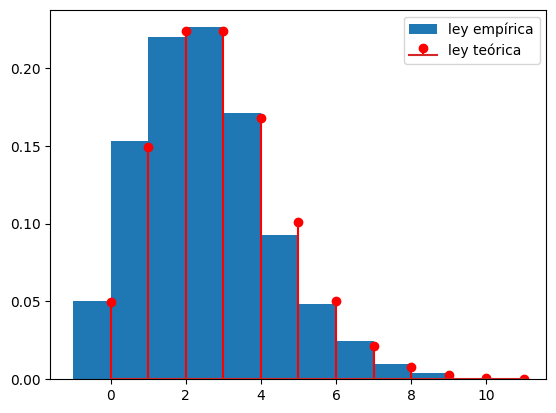

In [12]:
# Simulación de la aproximación de la Bonomial a la Poisson
param=3 # Parametro de la Poisson que queremos aproximar
n=1000 # Este es el número de ensayos en la distribución binomial
N=5000 # Este es el número de simulaciones que realizaremos.

# Genera una muestra de N valores aleatorios de una distribución binomial con parámetros:
# n = 1000 (número de ensayos), p = param/n = 3/1000
X=npr.binomial(n,param/n,N)

# Calcular la frecuencia relativa de los valores simulados
counts = np.bincount(X) / float(N)

# Crear un array de valores posibles
x = np.arange(len(counts))

# Calcular la función de masa de probabilidad (FMP) de la distribución Poisson teórica
f_x = sps.poisson.pmf(x, param)

plt.close()
plt.bar(x - 0.5, counts, width=1., label="ley empírica")
p2 = plt.stem(x, f_x, "r", label="ley teórica")
plt.legend()
plt.show()

## Variable aleatoria Geométrica con parámetro $p\in (0,1)$.

Esta variable aleatoria cuenta el número de fracasos antes del primer éxito en ensayos bernoulli independientes con parámetro $0<p<1$, y su función de masa de probabilidades está dada por:
$$f_{X}(k)=\begin{cases}
	p(1-p)^{k-1} &\quad \text{si } k=1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$


Notación. $X\sim Geo(p)$

La cual es una función de densidad ya que:
* $0\le f_{X}(k)\le 1$ para toda $x$.
* $$\begin{align*}
	\sum_{k\in R_{X}}f_{X}(k) &= \sum_{k=1}^{\infty}(1-p)^{k-1}p \\
			&= p\sum_{y=0}^{\infty}(1-p)^{y} \\
			&= p\left(\frac{1}{1-(1-p)}\right) = 1
		\end{align*}$$

Si por el contrario queremos contar el número de éxitos antes del primer fracaso, tenemos que la función de está dada por:
	$$f_{X}(k)=\begin{cases}
		p^{k}(1-p) &\quad \text{si } k=0,1,2,\dots \\
		\qquad 0 &\quad \text{en otro caso}  
	\end{cases}$$

Para calcular la Esperanza y Varianza de $X$, necesitamos del siguiente lema:

**Lema 1** Sea $x$ un número real tal que $│x│<1$. Entonces,
$$\sum_{k=1}^{\infty}kx^{k-1}=\frac{1}{(1-x)^2}.$$
**Demostración.** Se tiene que
$$\frac{d}{dx}\sum_{k=1}^{\infty}x^{k}=\sum_{k=1}^{\infty}kx^{k-1}.$$
Además,
$$\sum_{k=1}^{\infty}x^{k}=\frac{x}{1-x}.$$
Por lo tanto,
$$\frac{d}{dx}\frac{x}{1-x}=\frac{1}{(1-x)^2}.$$

Como corolario,
$$\sum_{k=1}^{\infty}k(k+1)x^{k-1}=\frac{2}{(1-x)^2}.$$
En efecto,
$$\frac{d}{dx}\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{k=1}^{\infty}k(k+1)x^{k-1}.$$
Ahora,
$$\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{m=2}^{\infty}mx^{m-1}=\frac{1}{(1-x)^2}-1.$$

Usando estos resultados, la esperanza de $X$ es:
\begin{align*}
\mathbb{E}[X]&=  \sum_{x \mathop \ge 1} k p(1-p)^{k - 1}\\
&= p \frac 1 {(1 - (1-p))^2}\\
&=  \frac p {p^2}\\
&=\frac{1}{p}
\end{align*}

Calculamos,
\begin{align*}
\mathbb{E}[X^2]&= \sum_{k=1}^{\infty} x^{2}p(1-p)^{k-1}\\
&=\sum_{k=1}^{\infty}k(k+1)(1-p)^{k-1}p-\sum_{k=1}^{\infty}p(1-p)^{k-1}
\end{align*}

Por el Lema 1,
$$\mathbb{E}[X^2]=p\frac{2}{p^3}-\frac{1}{p}=\frac{2}{p^2}-\frac{1}{p}.$$

Por lo tanto,
$$\text{Var}(X)=\frac{2}{p^2}-\frac{1}{p}-\frac{1}{p^2}=\frac{1-p}{p^2}.$$

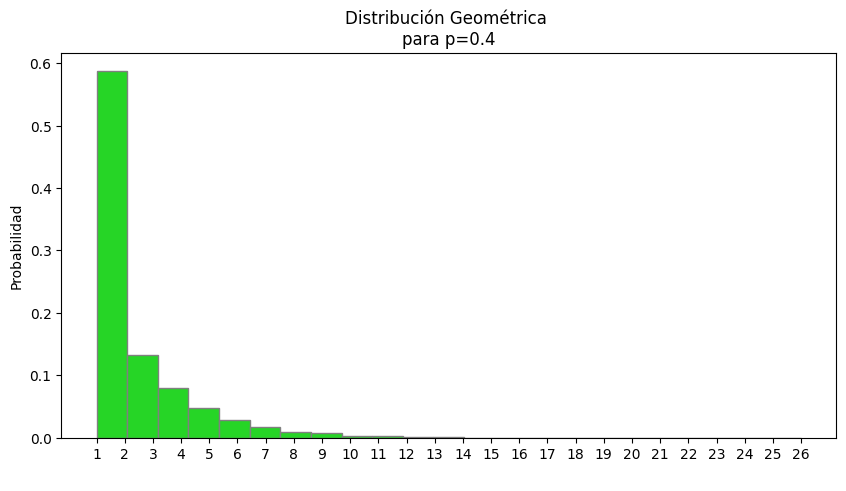

In [13]:
# Simulación de una distribución geométrica.
p = 0.4  # probabilidad de éxito
s = 100000  # tamaño de muestra (se generarán 100,000 v.a. geométricas)

random.seed(3)
geom_numeros = sps.geom.rvs(p, size=s) # genera variables aleatorias geométricas

#Creo un histograma
plt.figure(figsize=(10, 5))
plt.hist(
    geom_numeros,
    density=True,
    bins=len(np.unique(geom_numeros)),
    color="#26d526",
    edgecolor="grey",
)
plt.xlabel(" ")
plt.ylabel("Probabilidad")
plt.title("Distribución Geométrica \npara p=0.4")
plt.xticks(
    np.arange(min(geom_numeros), max(geom_numeros) + 1, 1.0)
)

plt.show()

**Ejemplo.** Cada una de $12$ personas lanza una moneda indefinidamente, deteniendo sus lanzamientos en el momento en que se obtiene por primera vez águila. ¿Cuál es la probabilidad de que por lo menos $10$ de ellas realicen menos de $4$ lanzamientos?

Sea $X$ el número de lanzamientos que se realizan antes de obtener por primera vez águila al lanzar una moneda indefinidamente y sea $Y$ el número de personas que realizan menos de $4$ lanzamientos. Así, $Y\sim \text{Binom}\left(12, p=\mathbb{P}(X<3) \right)$, en donde $X\sim \text{Geo}(1/2)$. Así,
- $p=\frac{7}{8}$.
- $\mathbb{P}(Y\geq 10)=0.818$

In [14]:
# Calcula la función de distribución acumulada (CDF) de la distribución geométrica
# para el valor k = 3 y la probabilidad de éxito p = 0.5.
p = sps.geom.cdf(3, 0.5)
print(p)
#La probabilidad buscada es:
P = 1-sps.binom.cdf(9, 12, p) # Cálculo de la probabilidad complementaria usando una distribución binomial
print(P)

0.875
0.8180006196344038


## Variable aleatoria Binomial Negativa con parámetros $r\geq 1$ y $p\in (0,1)$.

Supongamos que se realizan ensayos independientes, cada uno con probabilidad $0<p<1$ de ser un éxito, hasta obtener un total de $r$ éxitos acumulados. Sea $X$ el número de ensayos que se requieren, entonces su función de masa de probabilidades está dada por:
$$f_{X}(k)=\begin{cases}
	\binom{n-1}{r-1}p^{r}(1-p)^{n-r} &\quad \text{si } n=r,r+1,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$



Notación. $X\sim \text{BN}(r,p)$.

Se tiene que
$$\mathbb{E}[X]=\frac{r}{p}$$
y
$$\text{Var}[X]=\frac{r(1-p)}{p^2}.$$





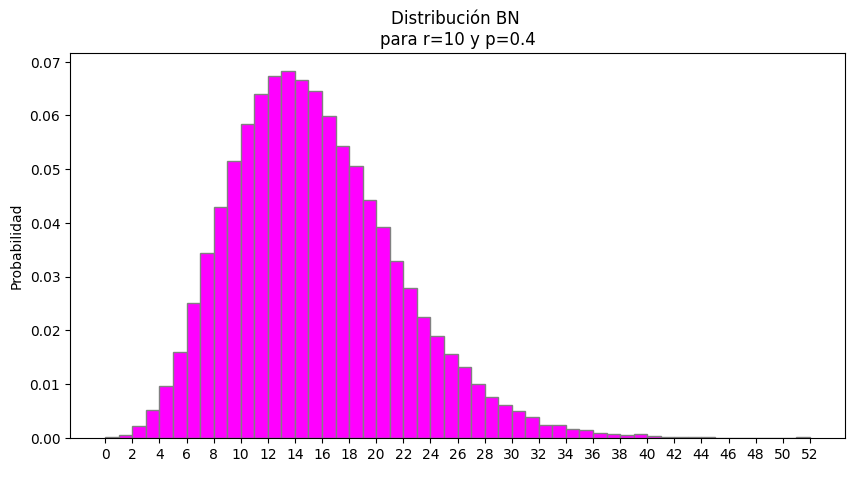

In [15]:
# Simulación de una distribución binomial negativa.
n = 10  # numbero de ensayos Bernoulli
p = 0.4  # probabilidad de éxito
s = 100000  # tamaño de muestra

random.seed(3)
geom_numeros = sps.nbinom.rvs(n,p, size=s) # genera v.a. Binomial Negativas

#Creo un histograma
plt.figure(figsize=(10, 5))
plt.hist(
    geom_numeros,
    density=True,
    bins=len(np.unique(geom_numeros)),
    color="#FF00FF",
    edgecolor="grey",
)
plt.xlabel(" ")
plt.ylabel("Probabilidad")
plt.title("Distribución BN \npara r=10 y p=0.4")
plt.xticks(
    np.arange(min(geom_numeros), max(geom_numeros) + 1, 2.0)
)

plt.show()

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estadística consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¿cuál es la probabilidad de que apruebe al contestar la pregunta duodécima?

In [16]:
from scipy.stats import geom
from scipy.stats import nbinom

In [17]:
#a) P(X=4) X numero de ensayo donde se da el primer exito
f4 = geom.pmf(4,0.7)
f4

0.018900000000000007

In [18]:
#b) P(X=2) x numero de fracasos antes del 10mo exito
#k numero de fracasos 2
#r numero de exitos 10
#p probabilidad de exito 0.7
f2 =nbinom.pmf(2,10,0.7)
f2

0.13982524825499987

$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su solución.


---


El problema de la caja de cerillos de Banach puede ser formulado de la siguiente manera:

**Enunciado:** Imagina que tienes una caja con $N$ cerillos y que cada cerillo puede ser extraído al azar. Después de retirar un cerillo, se repone a la caja y el proceso se repite. Si deseas calcular la probabilidad de que al menos uno de los cerillos se haya extraído un número específico de veces, ¿cuál es la probabilidad de que, después de una cierta cantidad de extracciones, todos los cerillos hayan sido extraídos al menos una vez?

Este problema se relaciona con la distribución uniforme y la probabilidad de cobertura completa de un conjunto. Se estudia cómo el número de extracciones afecta la probabilidad de que todos los cerillos hayan sido extraídos al menos una vez.

**Modelo de Extracción:**

Supón que extraes cerillos de una caja con reposición. Cada extracción es un evento independiente y cada cerillo tiene una probabilidad igual de ser extraído en cada evento.

**Cálculo de la Probabilidad:**

La probabilidad de que todos los cerillos se hayan extraído al menos una vez después de $n$ extracciones se puede aproximar utilizando conceptos de combinatoria y probabilidades.

**Solución Aproximada**

La probabilidad de que todos los cerillos sean extraídos al menos una vez después de $n$ extracciones se puede aproximar utilizando la fórmula para el problema de los "códigos de cobertura completa" o el problema de los "pajes en el bar".
Para $N$ cerillos y $n$ extracciones, la probabilidad de que todos los cerillos hayan sido extraídos al menos una vez se puede aproximar usando la fórmula:
$$P(N,n) = 1 - \frac{1}{N^n}\sum^{N-1}_{k=0}{(-1)}^k\binom{N}{k}{(N-k)}^n$$
Esta fórmula se basa en el principio de inclusión-exclusión y proporciona una aproximación para la probabilidad de cobertura completa.

## Variable aleatoria Hipergeométrica con parámetros $n,N,m$.

Supongamos que se elige, sin reemplazo, una muestra de tamaño $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el número de ebolas rojas seleccionadas, entonces su función de masa de probabilidades está dada por:
$$f_{X}(k)=
	\frac{\binom{m}{i}\binom{N-m}{n-i}}{\binom{N}{n}} \quad \text{si } i=0,1,\dots, n  
$$



Notación. $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$\mathbb{E}[X]=\frac{nm}{N}$$
y
$$\text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $i\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ e $i$:
$$\mathbb{P}(X=i)\approx \binom{n}{i}p^{i}(1-p)^{n-i}.$$

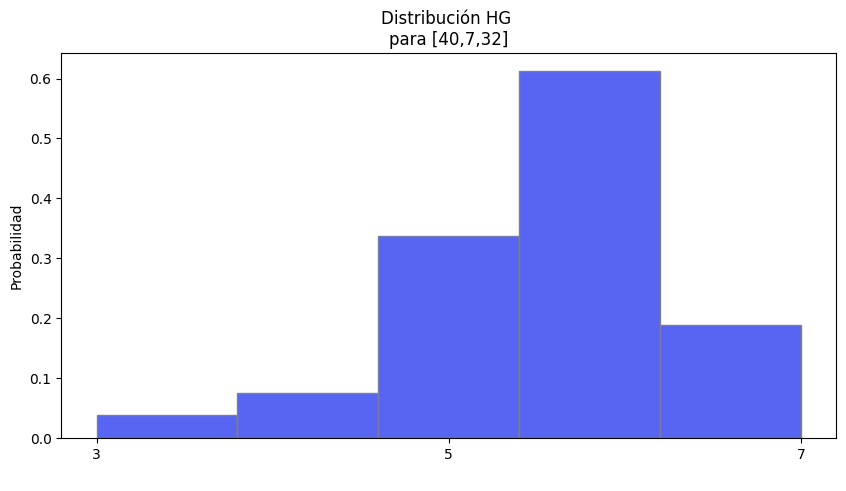

In [19]:
# Simulación de una distribución hipergeometrica.
n = 40  # tamaño total de la población
m = 32  # número de éxitos en la población
N = 7   # número de muestras (tamaño de la muestra)
s = 100 # número de simulaciones (tamaño de la muestra generada)


random.seed(3)
# Generamos variables aleatorias hipergeométricas
geom_numeros = sps.hypergeom.rvs(n, m, N, size=s)

#Creo un histograma
plt.figure(figsize=(10, 5))
plt.hist(
    geom_numeros,
    density=True,
    bins=len(np.unique(geom_numeros)),
    color="#5865F2",
    edgecolor="grey",
)
plt.xlabel(" ")
plt.ylabel("Probabilidad")
plt.title("Distribución HG \npara [40,7,32]")
plt.xticks(
    np.arange(min(geom_numeros), max(geom_numeros) + 1, 2.0)
)
plt.show()

$\color{red}{\text{Ejercicio 6.}}$ Una compañía petrolera realiza un estudio geológico que indica que un pozo petrolero exploratorio debería tener un 20% de posibilidades de encontrar petróleo.

- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?

In [20]:
#a) P(X=3) X numero de ensayo donde ocurre el primer exito
f3 = geom.pmf(3,0.2)
f3

0.12800000000000003

In [21]:
#b) P(X=4) x numero de fracasos antes del 3er exito
f4 = nbinom.pmf(4,3,0.2)
f4

0.04915200000000004

In [22]:
#Media
# parametros r,p
nbinom.mean(3,0.2)

12.000000000000002

In [24]:
#Varianza
nbinom.var(3,0.2)

60.0